In [1]:
from libeq.data_structure import SolverData
from libeq import EqSolver
from libeq.species_conc import species_concentration
import numpy as np
import matplotlib.pyplot as plt

%load_ext pyinstrument

# Create SolverData object
solver_data = SolverData.load_from_bstac(
    "/Users/lorenzo/Coding/libeq/notebooks/Zn-EDTA"
)
solver_data.distribution_opts.initial_log = 2
solver_data.distribution_opts.final_log = 12
solver_data.distribution_opts.log_increments = 0.1
solver_data.distribution_opts.independent_component = 2

In [2]:
solver_data.log_ks.shape

(0,)

In [3]:
independent_component_concentration = 10 ** -np.arange(
    solver_data.distribution_opts.initial_log,
    (
        solver_data.distribution_opts.final_log
        + solver_data.distribution_opts.log_increments
    ),
    solver_data.distribution_opts.log_increments,
)

In [4]:
solution, log_beta = EqSolver(solver_data, mode="distribution")

Ionic strength dependence is not implemented for distribution mode!
 No ionic strength dependence will be considered.
Done no solids


In [5]:
libeq_solution = np.insert(solution, 2, independent_component_concentration, axis=1)
pyes_solution = np.array([[1.906259e-03, 4.941995e-21, 1.000000e-01]])
log_beta = solver_data.log_beta

In [6]:
final_c = species_concentration(
    libeq_solution,
    log_beta,
    solver_data.stoichiometry,
    solver_data.solid_stoichiometry,
    full=True,
)

pyes_final_c = species_concentration(
    pyes_solution,
    log_beta,
    solver_data.stoichiometry,
    solver_data.solid_stoichiometry,
    full=True,
)

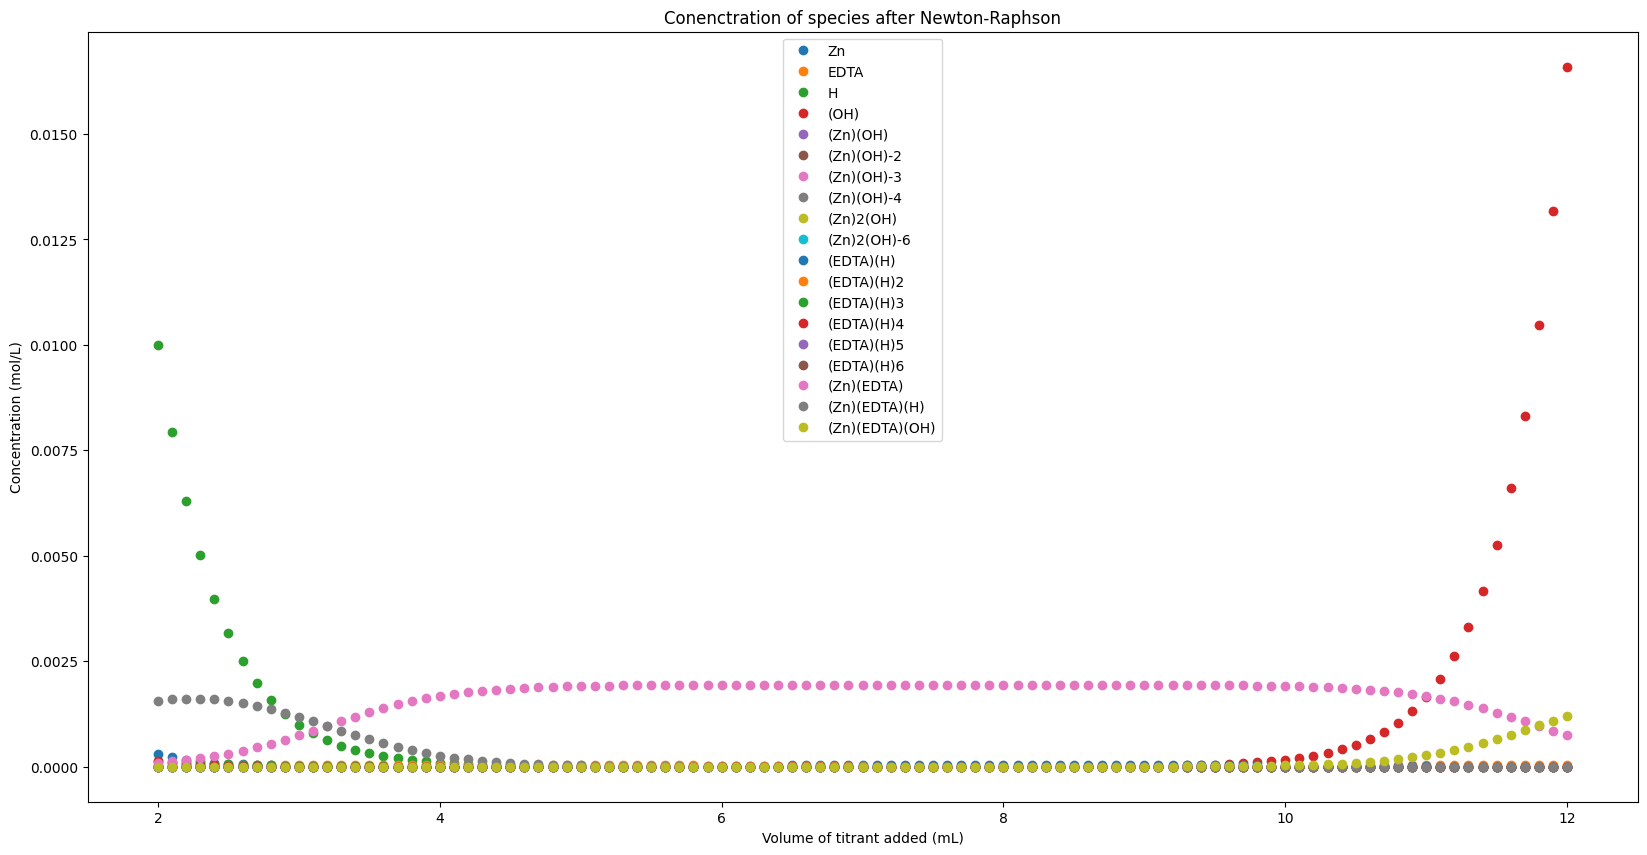

In [7]:
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.plot(
    -np.log10(independent_component_concentration),
    final_c,
    "o",
)
plt.title("Conenctration of species after Newton-Raphson")
plt.ylabel("Concentration (mol/L)")
plt.xlabel("Volume of titrant added (mL)")
plt.legend(
    handles=ax1.lines,
    labels=solver_data.species_names,
);